## WDI Data on CO2 and Per Capita Income

### Getting the data

In [1]:
library(tidyverse)
library(WDI)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [ ]:
new_wdi_cache <- WDIcache()

In [ ]:
WDIsearch("gdp.*capita.*PPP")

In [ ]:
new_wdi_cache <- WDIcache()

In [ ]:
WDIsearch("CO2.*capita")

In [ ]:
wdi_data <- WDI(indicator = c("NY.GDP.PCAP.PP.CD", "EN.ATM.CO2E.PC"),
               start = 2010, end = 2010, extra = TRUE)

In [ ]:
wdi_data <- wdi_data %>%
    filter(region != "Aggregate")

In [ ]:
wdi_data <- wdi_data %>%
    rename(GDPpercap = NY.GDP.PCAP.PP.CD,
          Emit_CO2percap = EN.ATM.CO2E.PC)

In [ ]:
write_csv(wdi_data, "wdi_CO2_GDP.csv")

In [2]:
wdi <- tibble(read.csv("wdi_CO2_GDP.csv"))

In [3]:
head(wdi)

iso2c country                                       year GDPpercap
1 1A    Arab World                                    2010 15025.468
2 1W    World                                         2010 12897.702
3 4E    East Asia & Pacific (excluding high income)   2010  8703.916
4 7E    Europe & Central Asia (excluding high income) 2010 15276.541
5 8S    South Asia                                    2010  4005.235
6 AD    Andorra                                       2010        NA
  Emit_CO2percap iso3c region                capital          longitude
1 4.630645       ARB   Aggregates                                 NA   
2 4.835741       WLD   Aggregates                                 NA   
3 5.088742       EAP   Aggregates                                 NA   
4 7.767355       ECA   Aggregates                                 NA   
5 1.206734       SAS   Aggregates                                 NA   
6 6.122595       AND   Europe & Central Asia Andorra la Vella 1.5218   
  latitude income      lending       
1      NA  Aggregates  Aggregates    
2      NA  Aggregates  Aggregates    
3      NA  Aggregates  Aggregates    
4      NA  Aggregates  Aggregates    
5      NA  Aggregates  Aggregates    
6 42.5075  High income Not classified

### Graphing the data

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 22 rows containing non-finite values (stat_bin)."


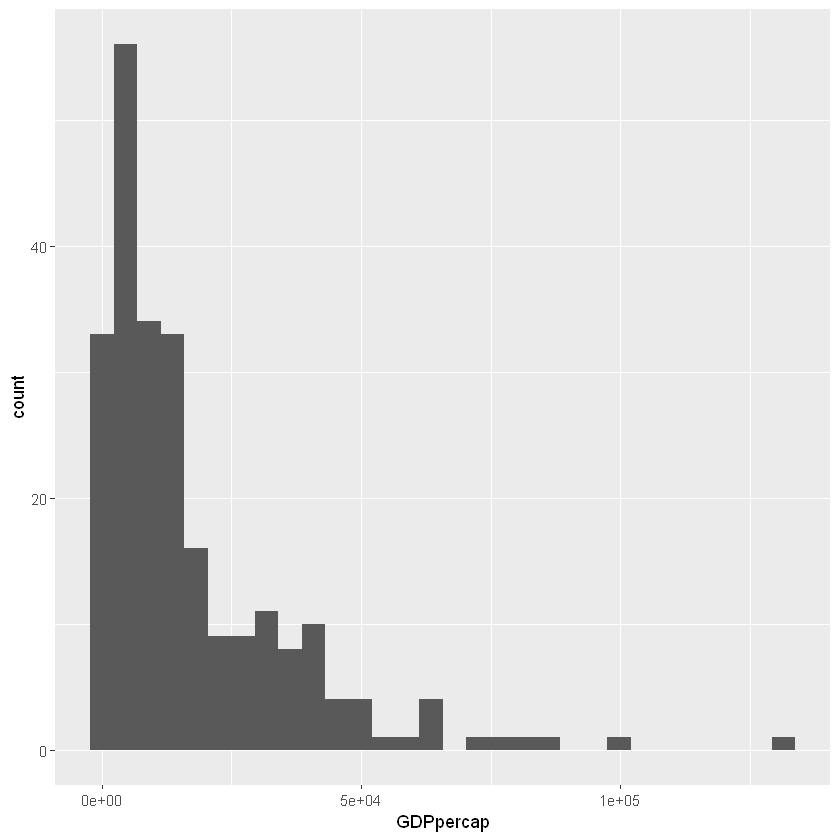

In [4]:
ggplot(wdi, aes(x = GDPpercap))+
    geom_histogram()

Warning message:
"Removed 22 rows containing non-finite values (stat_boxplot)."


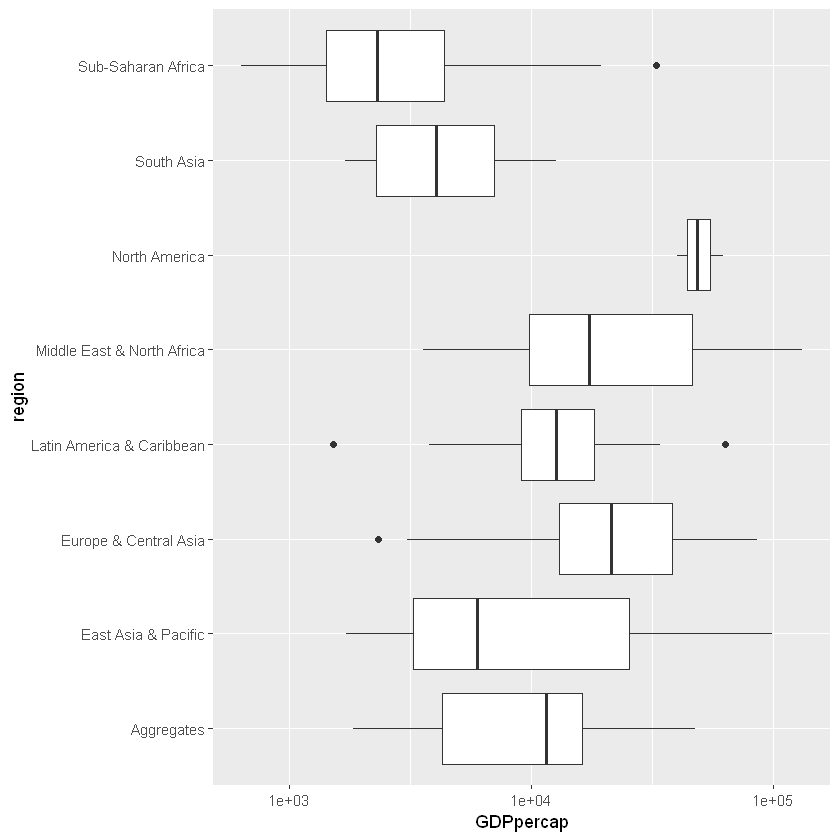

In [5]:
ggplot(wdi,
      aes(y = GDPpercap,
         x = region))+
    geom_boxplot()+
    coord_flip()+
    scale_y_log10()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 14 rows containing non-finite values (stat_bin)."


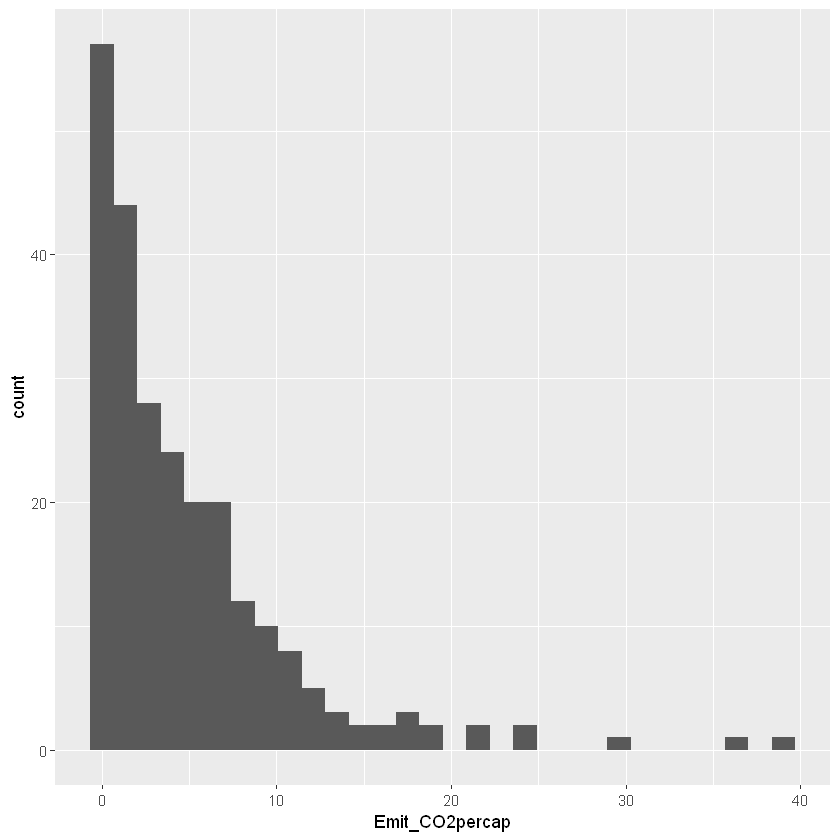

In [6]:
ggplot(wdi, aes(x = Emit_CO2percap))+
    geom_histogram()

Warning message:
"Removed 14 rows containing non-finite values (stat_boxplot)."


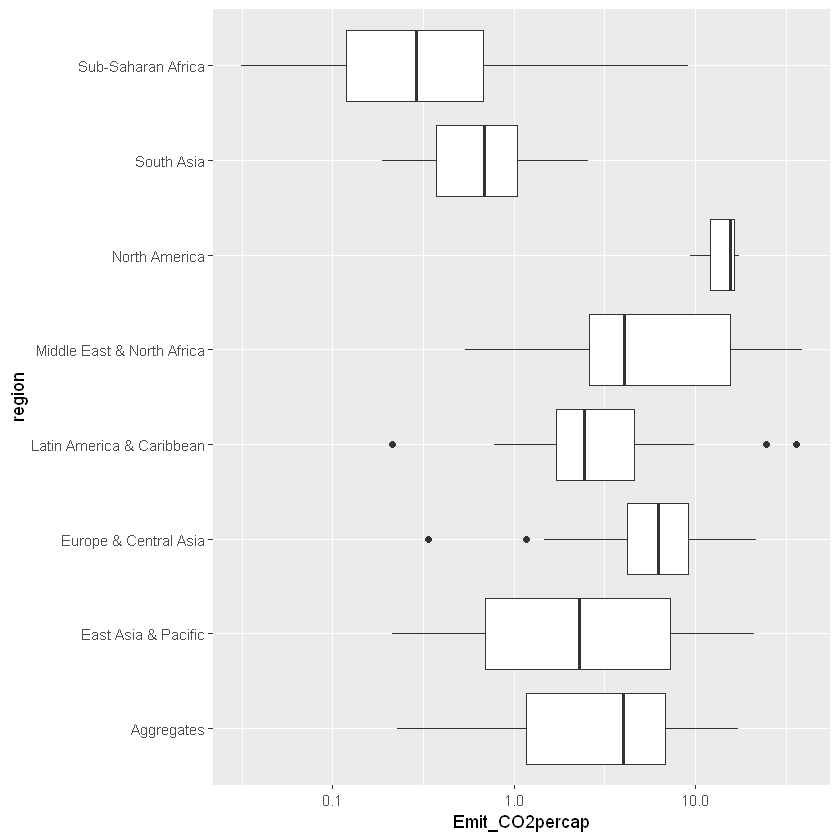

In [7]:
ggplot(wdi,
      aes(y = Emit_CO2percap,
         x = region))+
    geom_boxplot()+
    coord_flip()+
    scale_y_log10()

GDP per capita vs CO2 per capita

Warning message:
"Removed 27 rows containing missing values (geom_point)."


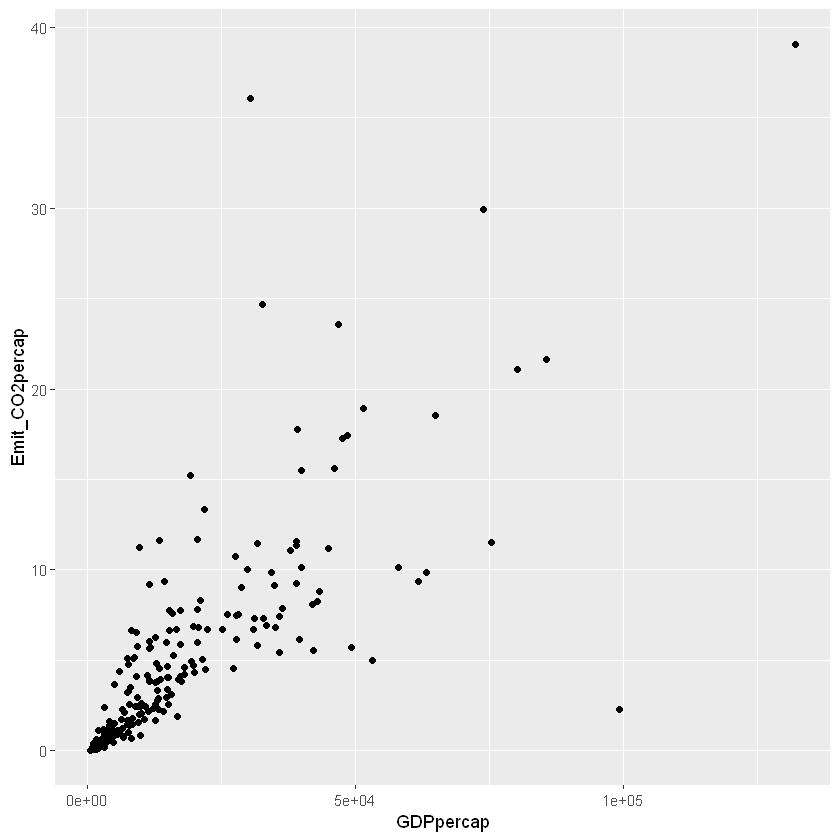

In [8]:
gg1 <- ggplot(wdi,
             aes(x=GDPpercap,
                y=Emit_CO2percap))+
       geom_point()
gg1

The data are clustered in the bottom left corner and very spread out away from there. To get a more even distribution of the data, we use axes with log scales. We also add a smooth:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
"Removed 27 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 27 rows containing missing values (geom_point)."


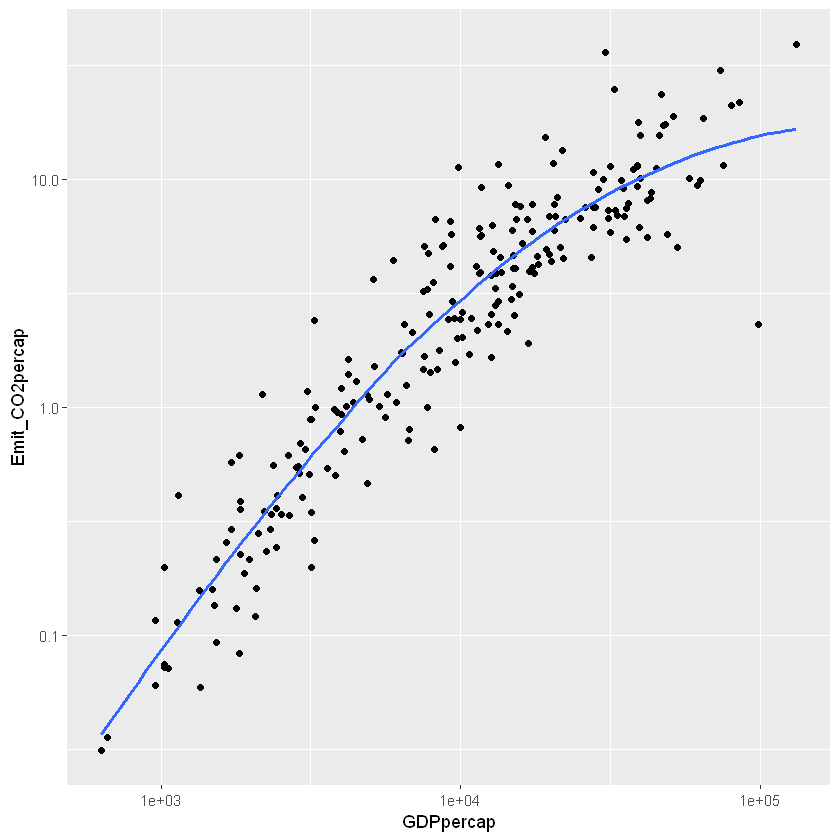

In [9]:
gg2 <- gg1 + geom_smooth(se = FALSE) +
        scale_x_log10()+
        scale_y_log10()
gg2

## Mapping the data

In [10]:
library(maps)


Attaching package: 'maps'


The following object is masked from 'package:purrr':

    map




In [11]:
dat_map <- map_data("world")
dim(dat_map)

[1] 99338     6

In [12]:
class(dat_map)

[1] "data.frame"

In [13]:
head(dat_map)

long      lat      group order region subregion
1 -69.89912 12.45200 1     1     Aruba  NA       
2 -69.89571 12.42300 1     2     Aruba  NA       
3 -69.94219 12.43853 1     3     Aruba  NA       
4 -70.00415 12.50049 1     4     Aruba  NA       
5 -70.06612 12.54697 1     5     Aruba  NA       
6 -70.05088 12.59707 1     6     Aruba  NA

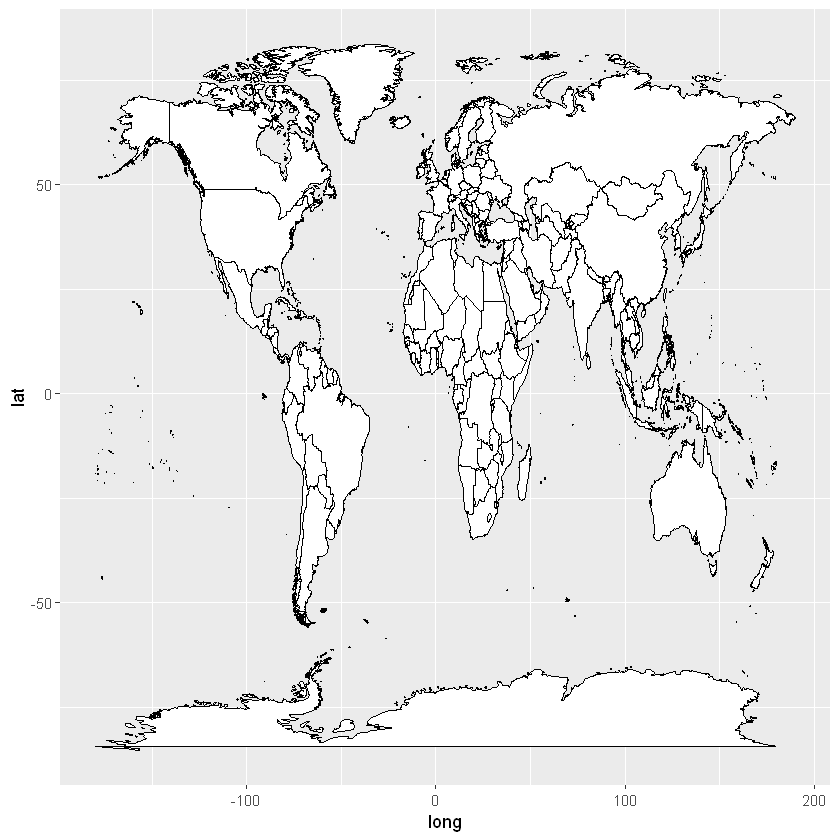

In [14]:
ggplot(dat_map, aes(x = long, y = lat, group=group))+
    geom_polygon(fill = "white", colour = "black")

In [15]:
library(countrycode)

In [16]:
head(dat_map)

long      lat      group order region subregion
1 -69.89912 12.45200 1     1     Aruba  NA       
2 -69.89571 12.42300 1     2     Aruba  NA       
3 -69.94219 12.43853 1     3     Aruba  NA       
4 -70.00415 12.50049 1     4     Aruba  NA       
5 -70.06612 12.54697 1     5     Aruba  NA       
6 -70.05088 12.59707 1     6     Aruba  NA

In [17]:
dat_map$ccode <- countrycode(dat_map$region,
                            origin='country.name',
                            destination='wb')

Warning message in countrycode(dat_map$region, origin = "country.name", destination = "wb"):
"Some values were not matched unambiguously: Anguilla, Antarctica, Ascension Island, Azores, Barbuda, Bonaire, Canary Islands, Chagos Archipelago, Christmas Island, Cocos Islands, Cook Islands, Falkland Islands, French Guiana, French Southern and Antarctic Lands, Grenadines, Guadeloupe, Guernsey, Heard Island, Jersey, Madeira Islands, Martinique, Mayotte, Micronesia, Montserrat, Niue, Norfolk Island, Pitcairn Islands, Reunion, Saba, Saint Barthelemy, Saint Helena, Saint Martin, Saint Pierre and Miquelon, Siachen Glacier, Sint Eustatius, South Georgia, South Sandwich Islands, Vatican, Virgin Islands, Wallis and Futuna, Western Sahara
"


In [18]:
wdi$ccode <- countrycode(wdi$country,
                        origin="country.name",
                        destination="wb")

Warning message in countrycode(wdi$country, origin = "country.name", destination = "wb"):
"Some values were not matched unambiguously: Arab World, Caribbean small states, Central Europe and the Baltics, Early-demographic dividend, East Asia & Pacific, East Asia & Pacific (excluding high income), East Asia & Pacific (IDA & IBRD countries), Euro area, Europe & Central Asia, Europe & Central Asia (excluding high income), Europe & Central Asia (IDA & IBRD countries), European Union, Fragile and conflict affected situations, Heavily indebted poor countries (HIPC), High income, IBRD only, IDA & IBRD total, IDA blend, IDA only, IDA total, Late-demographic dividend, Latin America & Caribbean (excluding high income), Latin America & the Caribbean (IDA & IBRD countries), Least developed countries: UN classification, Low & middle income, Low income, Lower middle income, Middle East & North Africa, Middle East & North Africa (excluding high income), Middle East & North Africa (IDA & IBRD countries

In [19]:
merged <- full_join(dat_map, wdi,
                   by="ccode")

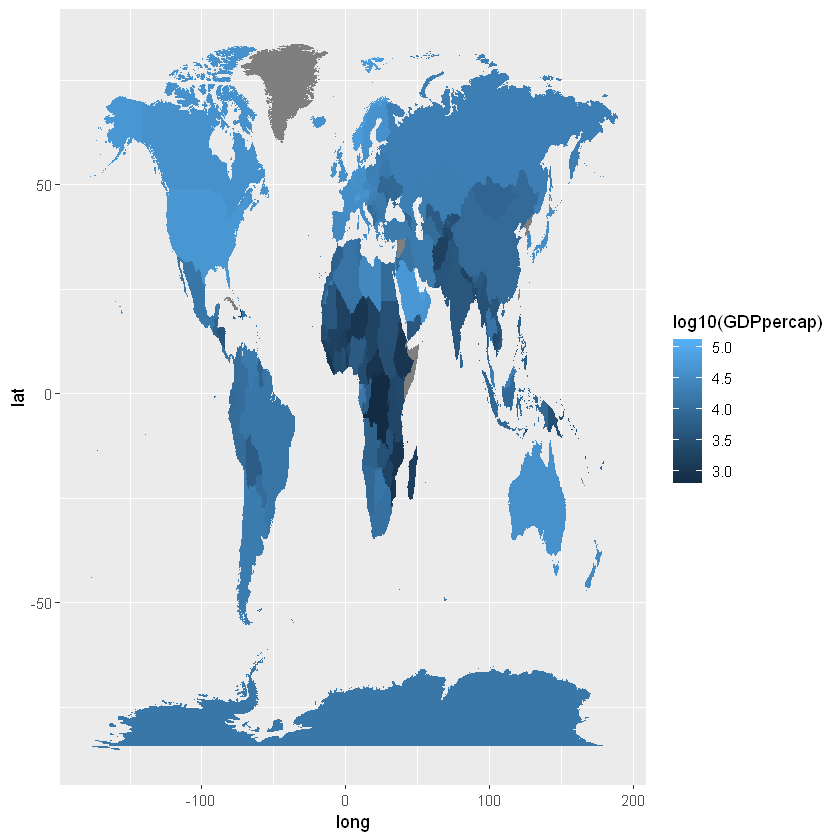

In [22]:
ggplot(merged, aes(x = long, y = lat,
                  group = group, fill=log10(GDPpercap)))+
    geom_polygon()

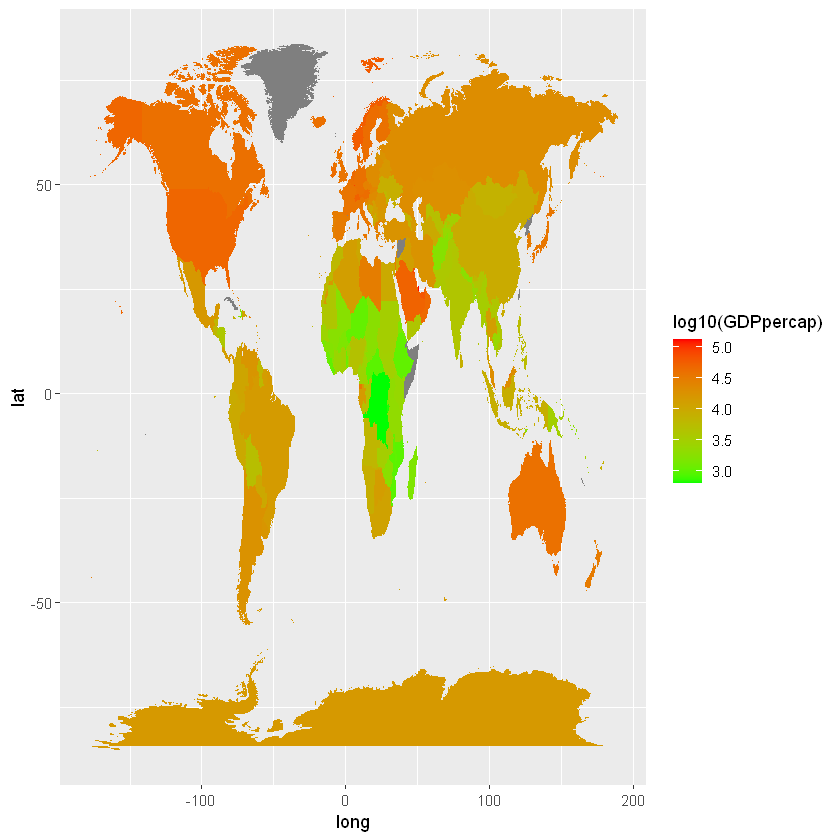

In [25]:
ggplot(merged, aes(x=long,y=lat,
      group=group, fill=log10(GDPpercap)))+
    geom_polygon()+
    scale_fill_gradient(low = "green",
                       high = "red")

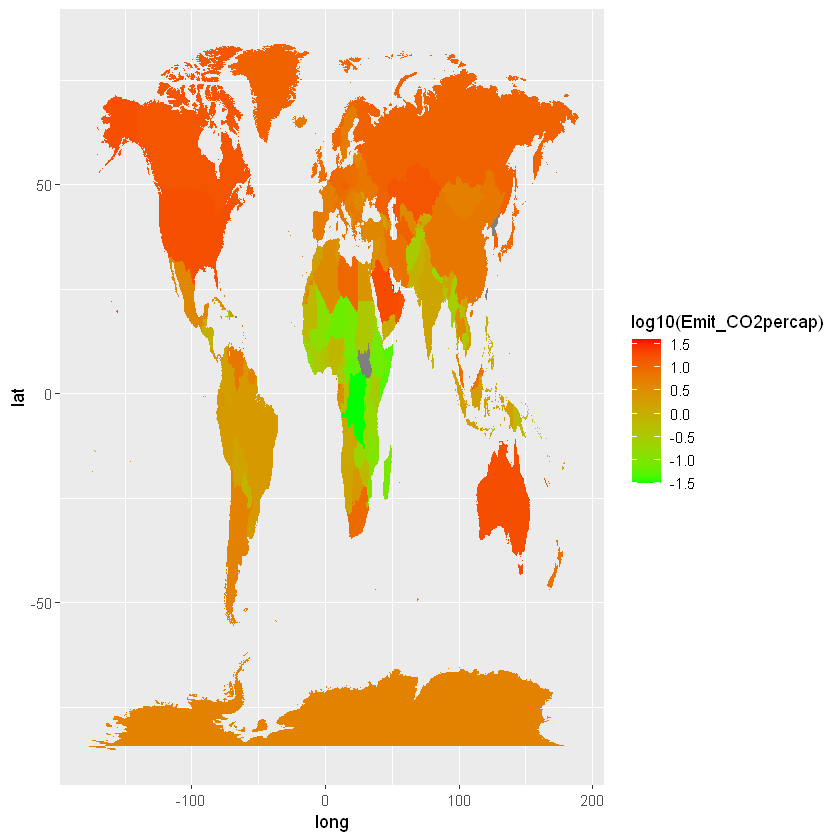

In [26]:
ggplot(merged, aes(x=long,y=lat,
      group=group, fill=log10(Emit_CO2percap)))+
    geom_polygon()+
    scale_fill_gradient(low = "green",
                       high = "red")

# Questions

Check the means and std of x3, x4 and y3, y4. Also regress y3 on x3 and y4 on x4. Make scatter plots of y3 vs x3 and y4 vs x4! 

In [27]:
data(anscombe)
ans <- anscombe
ans %>% 
    summarize(mean.x3 = mean(x3),
             mean.x4 = mean(x4),
             mean.y3 = mean(y3),
             mean.y4 = mean(y4))

mean.x3 mean.x4 mean.y3 mean.y4 
1 9       9       7.5     7.500909

In [29]:
mod3 <- lm(y3 ~ x3, data = ans)
mod4 <- lm(y4 ~ x4, data = ans)

In [31]:
library(texreg)
texreg(list(mod3,mod4),
      custom.model.names = c("mod3", "mod4"),
      caption="Regression of y3 on x3 and y4 on x4",
      caption.above = TRUE)

\begin{table}
\caption{Regression of y3 on x3 and y4 on x4}
\begin{center}
\begin{tabular}{l c c}
\hline
 & mod3 & mod4 \\
\hline
(Intercept) & $3.00^{*}$  & $3.00^{*}$  \\
            & $(1.12)$    & $(1.12)$    \\
x3          & $0.50^{**}$ &             \\
            & $(0.12)$    &             \\
x4          &             & $0.50^{**}$ \\
            &             & $(0.12)$    \\
\hline
R$^2$       & $0.67$      & $0.67$      \\
Adj. R$^2$  & $0.63$      & $0.63$      \\
Num. obs.   & $11$        & $11$        \\
\hline
\multicolumn{3}{l}{\scriptsize{$^{***}p<0.001$; $^{**}p<0.01$; $^{*}p<0.05$}}
\end{tabular}
\label{table:coefficients}
\end{center}
\end{table}

`geom_smooth()` using formula 'y ~ x'



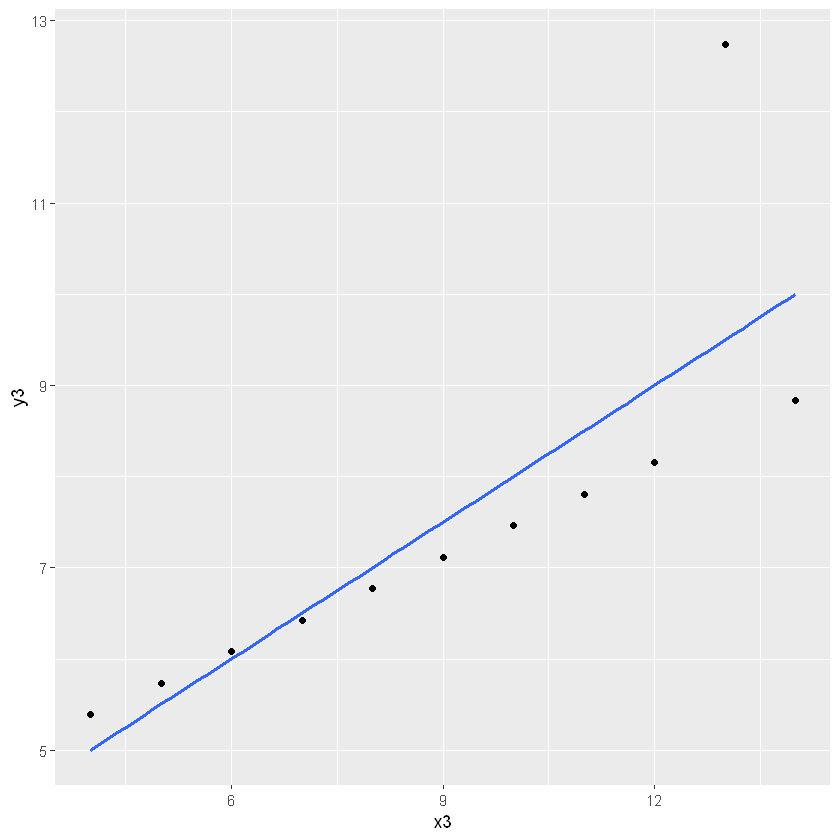

In [32]:
ggplot(ans, aes(x=x3, y=y3))+
    geom_point()+
    geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula 'y ~ x'



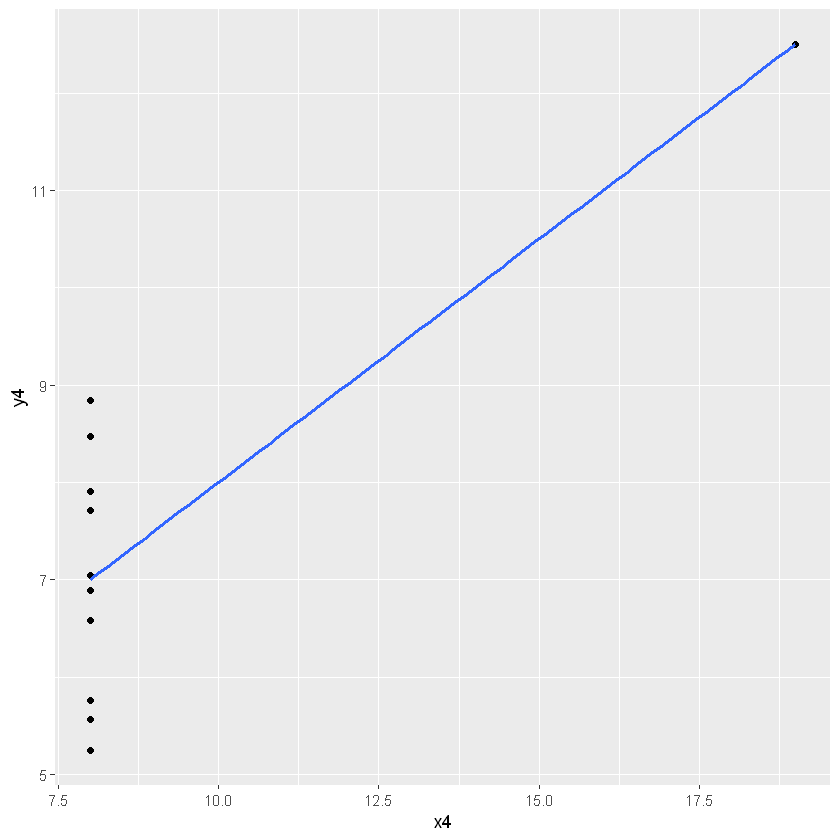

In [33]:
ggplot(ans, aes(x=x4,y=y4))+
    geom_point()+
    geom_smooth(method="lm", se=FALSE)

In [38]:
ifri <- read_csv("data/ifri_car_liv.csv")
ifri <- ifri %>% 
    rename(carbon = zbio, liveli = zliv)
head(ifri)

Parsed with column specification:
cols(
  forest_id = col_double(),
  cid = col_character(),
  zliv = col_double(),
  zbio = col_double(),
  livcar1 = col_double(),
  ownstate = col_double(),
  distance = col_double(),
  sadmin = col_double(),
  rulematch = col_double(),
  lnfsize = col_double()
)



forest_id cid liveli     carbon     livcar1 ownstate distance sadmin
1 217       NEP -0.6139841 -0.4509847 3       1        2         0    
2 325       IND -0.6538849 -0.3653702 3       1        1         1    
3  88       UGA -0.3383080 -0.9703643 3       1        1         3    
4 174       NEP -0.7855347 -1.3251940 3       1        2        26    
5 240       NEP -0.4502251 -1.0492220 3       1        2         3    
6 287       TAN -0.1834945 -0.8323973 3       1        1        40    
  rulematch lnfsize 
1 0         4.430817
2 0         8.196712
3 0         4.941642
4 0         5.288267
5 1         4.343805
6 1         6.214608

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 20 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 20 rows containing missing values (geom_point)."
`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 20 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 20 rows containing missing values (geom_point)."


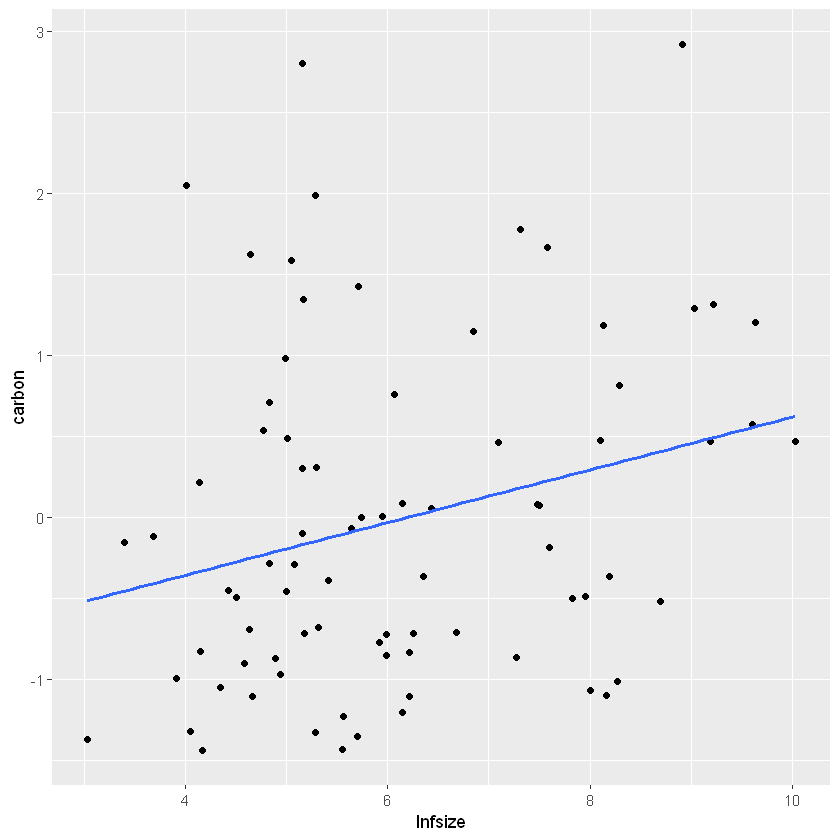

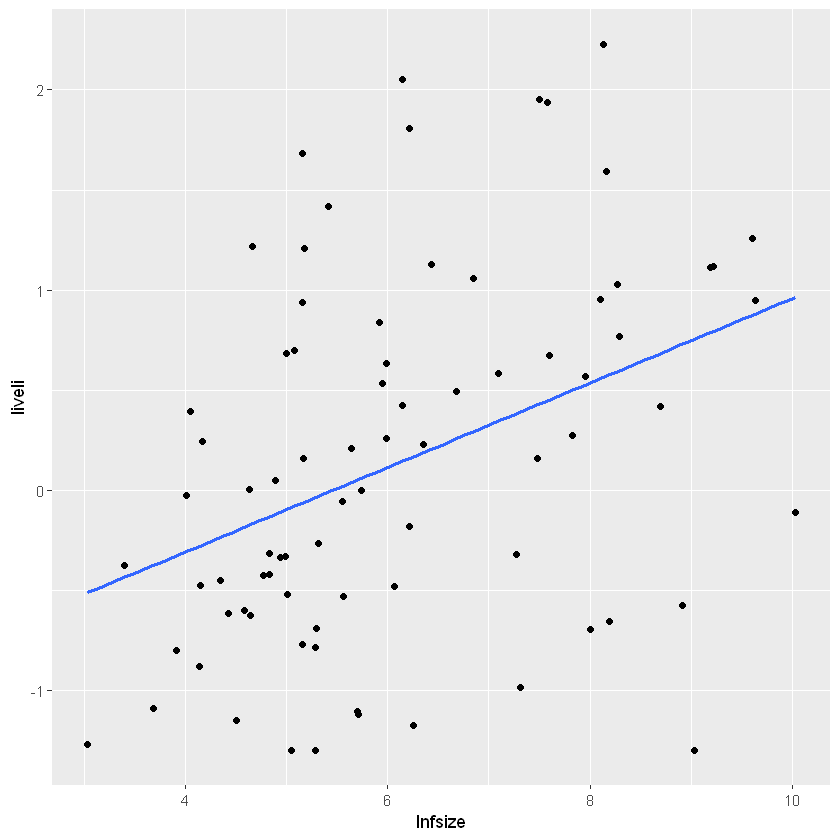

In [40]:
# Carbon and livelihoods vs lnfsize (Log of Forest Size)
ggplot(ifri, aes(x=lnfsize,
                y=carbon))+
    geom_point()+
    geom_smooth(method = "lm", se = FALSE)

ggplot(ifri, aes(x=lnfsize,
                y=liveli))+
    geom_point()+
    geom_smooth(method = "lm", se = FALSE)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 14 rows containing non-finite values (stat_bin)."


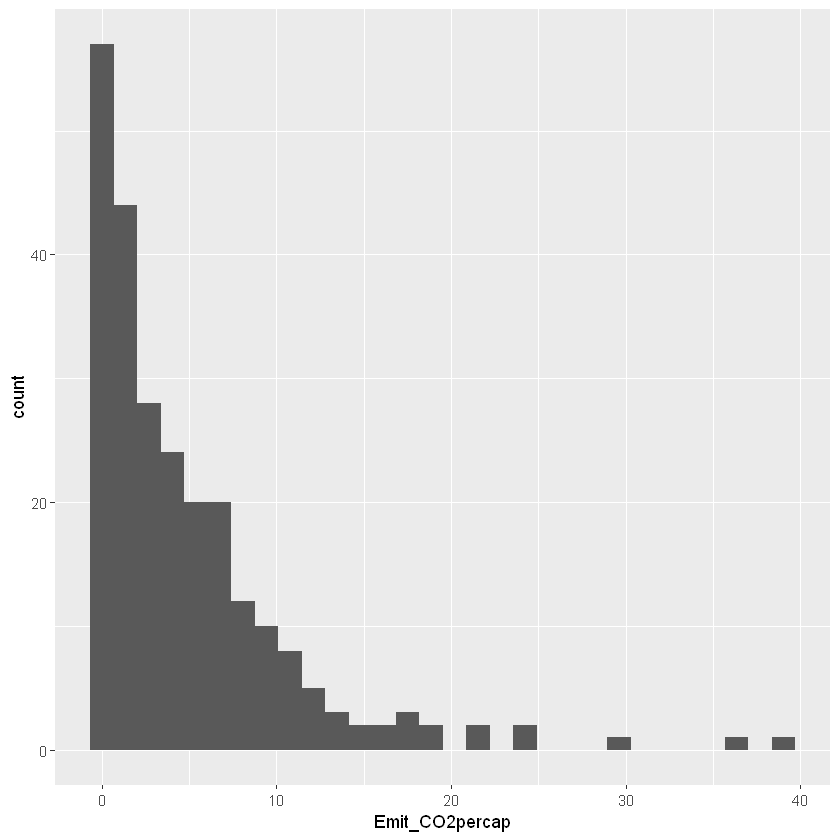

In [41]:
ggplot(wdi,
      aes(x = Emit_CO2percap))+
geom_histogram()

Warning message:
"Removed 14 rows containing non-finite values (stat_boxplot)."


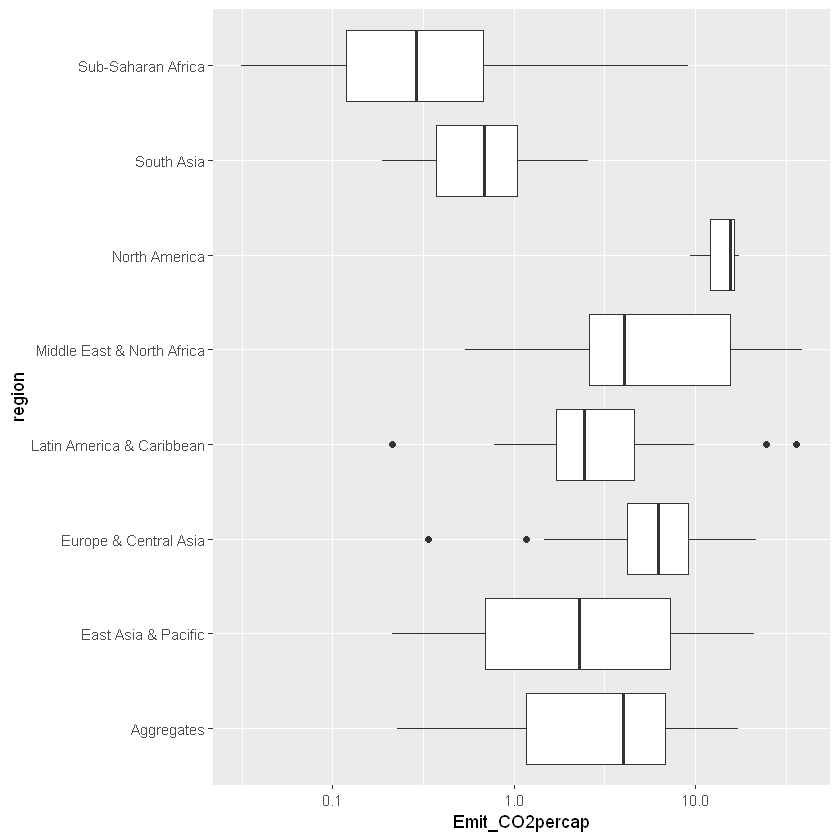

In [42]:
ggplot(wdi,
      aes(y = Emit_CO2percap,
         x = region))+
    geom_boxplot()+
    coord_flip()+
    scale_y_log10()